### Notebook 4-1
# Regresión: reto normal

## Se pide:

Se deberán probar todos los modelos posibles para cada uno de los siguientes problemas de negocio, industrializando en el paquete solamente el mejor de ellos para cada uno de los casos, con los mejores hiperparámetros y transformaciones previas encontradas.

<b>Regresión</b>:<br>
<b>Reto normal</b>:<br>
Intentar predecir el número de likes.<br>

## Importaciones

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Carga de datos
Carga del fichero de datos generado al final del EDA.

In [2]:
df = pd.read_csv('..//data//processed//csv_eda.csv', index_col=0)

In [3]:
df.columns

Index(['title', 'channel_title', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled', 'category',
       'country', 'trending_date_year', 'trending_date_month',
       'publish_time_year', 'publish_time_month', 'ratio_viralidad',
       'ratio_interaccion_dia', 'publish_trending_days',
       'channel_title_encoded', 'tags_encoded', 'category_encoded',
       'country_encoded', 'views_encoded', 'likes_encoded', 'dislikes_encoded',
       'comment_count_encoded', 'ratio_interaccion_dia_encoded',
       'trending_date_year_encoded', 'trending_date_month_encoded',
       'publish_time_year_encoded', 'publish_time_month_encoded'],
      dtype='object')

Eliminamos la variable title, que no la vamos a usar.

In [4]:
df = df.drop('title', axis='columns')

In [5]:
df

,channel_title,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,category,country,...,country_encoded,views_encoded,likes_encoded,dislikes_encoded,comment_count_encoded,ratio_interaccion_dia_encoded,trending_date_year_encoded,trending_date_month_encoded,publish_time_year_encoded,publish_time_month_encoded
0,EminemVEVO,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,False,False,Music,CA,...,0,2.195188,4.501606,1.803614,4.773962,4.334115,-1.823782,0.909091,-1.758901,0.909091
1,iDubbbzTV,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,False,False,Comedy,CA,...,0,-0.046118,0.536588,-0.020748,0.342217,0.455009,-1.823782,0.909091,-1.758901,0.909091
2,Rudy Mancuso,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,False,False,Comedy,CA,...,0,0.256091,0.646234,0.138859,0.151795,0.536320,-1.823782,0.909091,-1.758901,0.909091
3,nigahiga,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,False,False,Entertainment,CA,...,0,0.103985,0.563307,-0.007590,0.518462,0.499064,-1.823782,0.909091,-1.758901,0.909091
4,Ed Sheeran,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,False,False,Music,CA,...,0,4.467192,9.591119,0.827083,3.171140,8.064620,-1.823782,0.909091,-1.758901,0.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,AaronsAnimals,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,False,False,Pets & Animals,US,...,9,0.047033,-0.002199,-0.033994,-0.065135,-0.007461,0.548311,0.454545,0.568537,0.363636
375938,zefrank1,[none],1064798,60008,382,3936,False,False,People & Blogs,US,...,9,-0.039156,0.129129,-0.077842,-0.014908,0.106531,0.548311,0.454545,0.568537,0.363636
375939,Brad Mondo,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,False,False,Entertainment,US,...,9,-0.038926,0.057358,-0.049426,-0.012709,0.048649,0.548311,0.454545,0.568537,0.363636
375940,How It Should Have Ended,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,False,False,Film & Animation,US,...,9,0.598922,0.928280,0.029875,0.344494,0.850929,0.548311,0.454545,0.568537,0.363636


# Crear un algoritmo de regresión que prediga los likes del vídeo.

Nuestra variable objetivo va a ser 'likes'. Vamos a comenzar estudiando esta variable y la relación de las demás variables con ella.

### Variable objetivo

<b>likes</b><br>
Variable numérica continua con un 1,9% de valores a cero y un 20,3% de valores únicos.<br>
Gran cantidad de valores extremos, pero válidos.

In [6]:
df[['likes']].describe()

,likes
count,3.622830e+05
mean,3.852578e+04
std,1.663629e+05
min,0.000000e+00
25%,6.790000e+02
50%,3.547000e+03
75%,1.795500e+04
max,5.613827e+06


In [7]:
df[['likes']].nunique()

likes    73692
dtype: int64

In [8]:
df['likes'].value_counts(normalize=True)

likes
0         0.018817
29        0.000726
36        0.000718
35        0.000712
38        0.000698
            ...   
63748     0.000003
141252    0.000003
240652    0.000003
142277    0.000003
357079    0.000003
Name: proportion, Length: 73692, dtype: float64

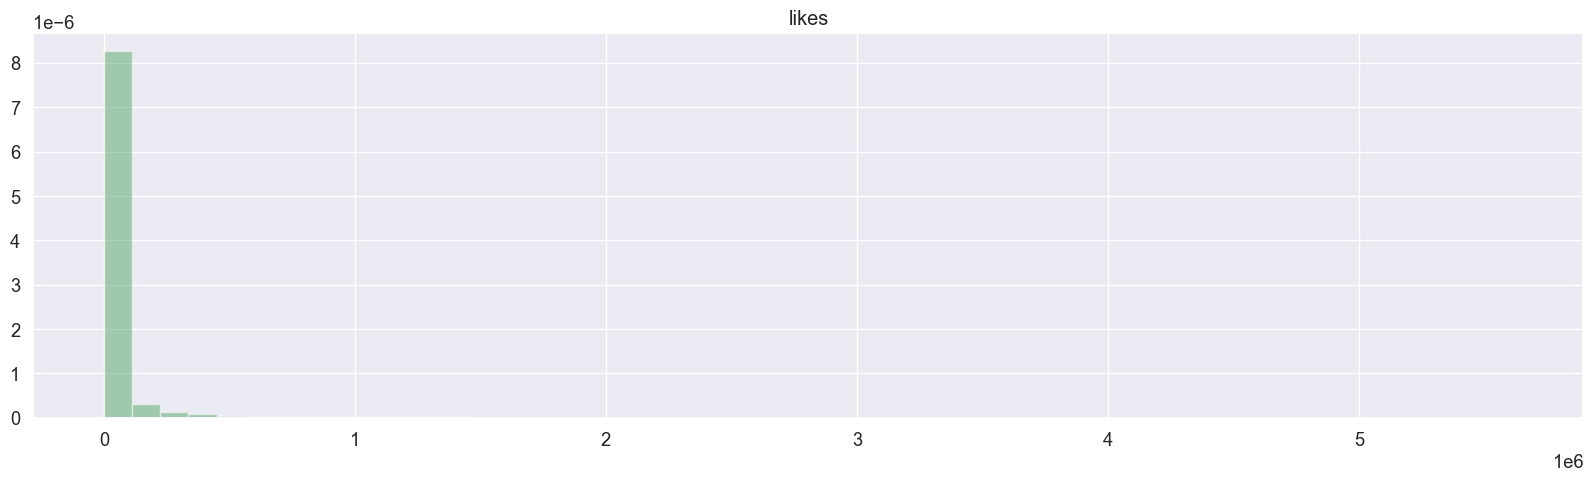

In [9]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 5))

plt.hist(x=df['likes'], bins=50, density=True, facecolor='g', alpha=0.5)
plt.title('likes')
plt.show()

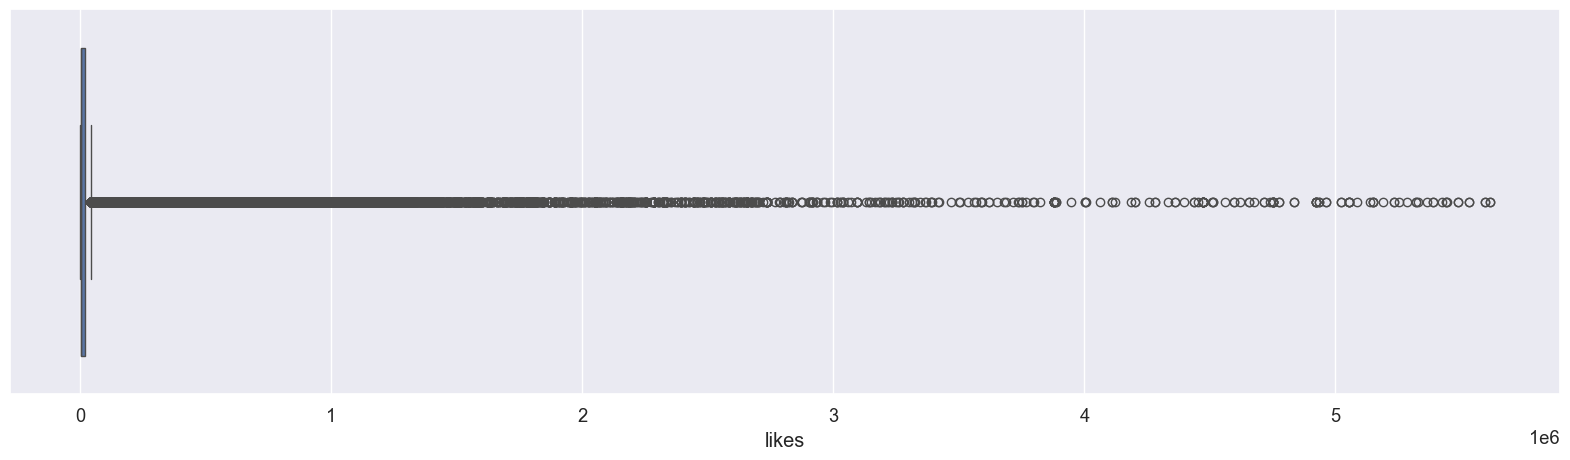

In [10]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 5))

sns.boxplot(x=df['likes'])
plt.show()

## Variables numéricas y variable objetivo

<b>Gráficas de dispersión y matrices de correlación</b>

Lista de variables numéricas para la graficación:

In [11]:
df.columns

Index(['channel_title', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'category', 'country',
       'trending_date_year', 'trending_date_month', 'publish_time_year',
       'publish_time_month', 'ratio_viralidad', 'ratio_interaccion_dia',
       'publish_trending_days', 'channel_title_encoded', 'tags_encoded',
       'category_encoded', 'country_encoded', 'views_encoded', 'likes_encoded',
       'dislikes_encoded', 'comment_count_encoded',
       'ratio_interaccion_dia_encoded', 'trending_date_year_encoded',
       'trending_date_month_encoded', 'publish_time_year_encoded',
       'publish_time_month_encoded'],
      dtype='object')

In [12]:
graphical_col = ['views', 'dislikes', 'comment_count', 'trending_date_year', 'trending_date_month', 'publish_time_year', 'publish_time_month', 'ratio_viralidad', 'ratio_interaccion_dia', 'publish_trending_days']

In [13]:
def dispersion_num(df, var_num, lista_var_num, filas, columnas):
    '''
    Grafica las gráficas de dispersión de una variable numérica (x) y todas las demás numéricas
    df: dataframe
    var_num: variable numérica
    lista_var_num: lista de variables numéricas
    filas: número de filas a graficar
    columnas: número de columnas a graficar
    '''
    sns.set(font_scale=1.2)
    plt.figure(figsize=(30, 5))
    #plt.suptitle(var_num, fontsize=32, y=1)
    k = 1
    x = var_num
    for y in lista_var_num:
        if x != y:
            plt.subplot(filas, columnas, k)
            plt.scatter(x=df[x], y=df[y])
            plt.xlabel(f'{x}')
            plt.ylabel(f'{y}')
            plt.xticks([])
            k += 1
    #plt.tight_layout()
    plt.show()

In [14]:
def corr_num(df, var_num, lista_var_num, filas, columnas):
    '''
    Grafica las gráficas de correlación de una variable numérica (x) y todas las demás numéricas
    df: dataframe
    var_num: variable numérica
    lista_var_num: lista de variables numéricas
    filas: número de filas a graficar
    columnas: número de columnas a graficar
    '''
    sns.set(font_scale=1.2)
    plt.figure(figsize=(30, 5))
    #plt.suptitle(var_num, fontsize=32, y=1)
    k = 1
    x = var_num
    for y in lista_var_num:
        if x != y:
            plt.subplot(filas, columnas, k)
            corr_matrix = df[[x, y]].corr(numeric_only=True)
            sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(20, 220, n=256))
            k += 1
    #plt.tight_layout()
    plt.show()

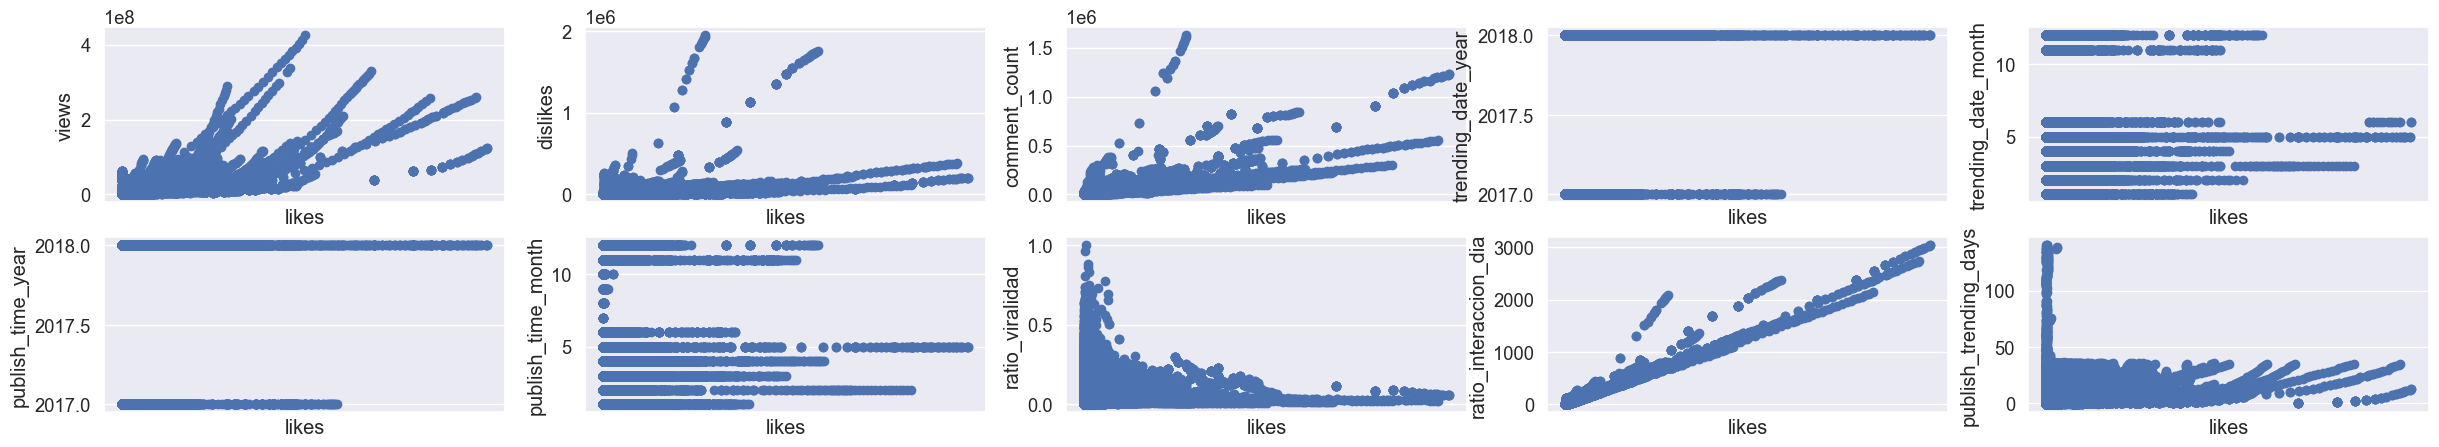

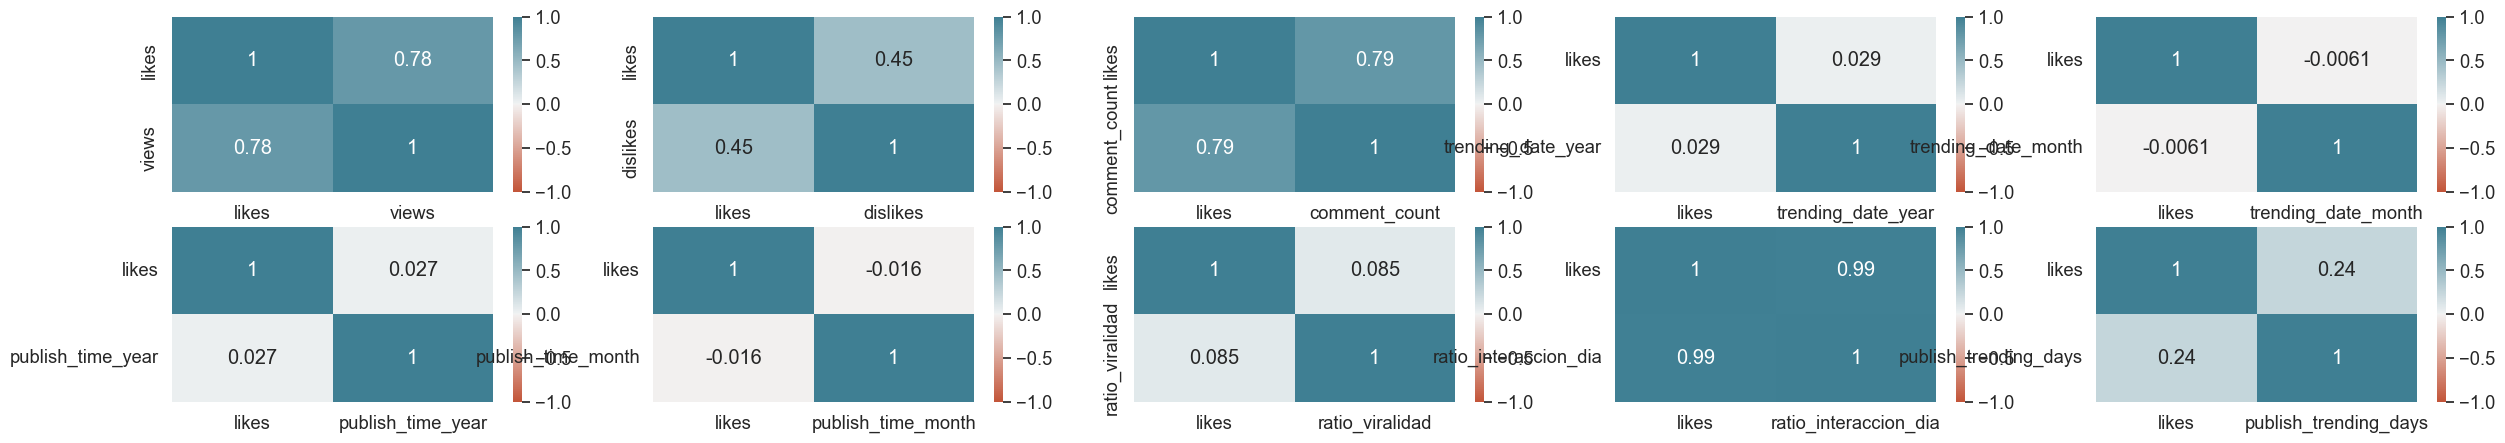

In [15]:
x = 'likes'
dispersion_num(df, x, graphical_col, 2, 5)
corr_num(df, x, graphical_col, 2, 5)

likes presenta una muy alta correlación con ratio_interaccion_dia, una alta correlación con views y comment_count, y correlación media con dislikes.

## Variables categóricas y variable objetivo

<b>comments_disabled</b><br>
Hay muchos más likes en las publicaciones con los comentarios habilitados.

C:\Users\Enrique\AppData\Local\Temp\ipykernel_12496\2884444561.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


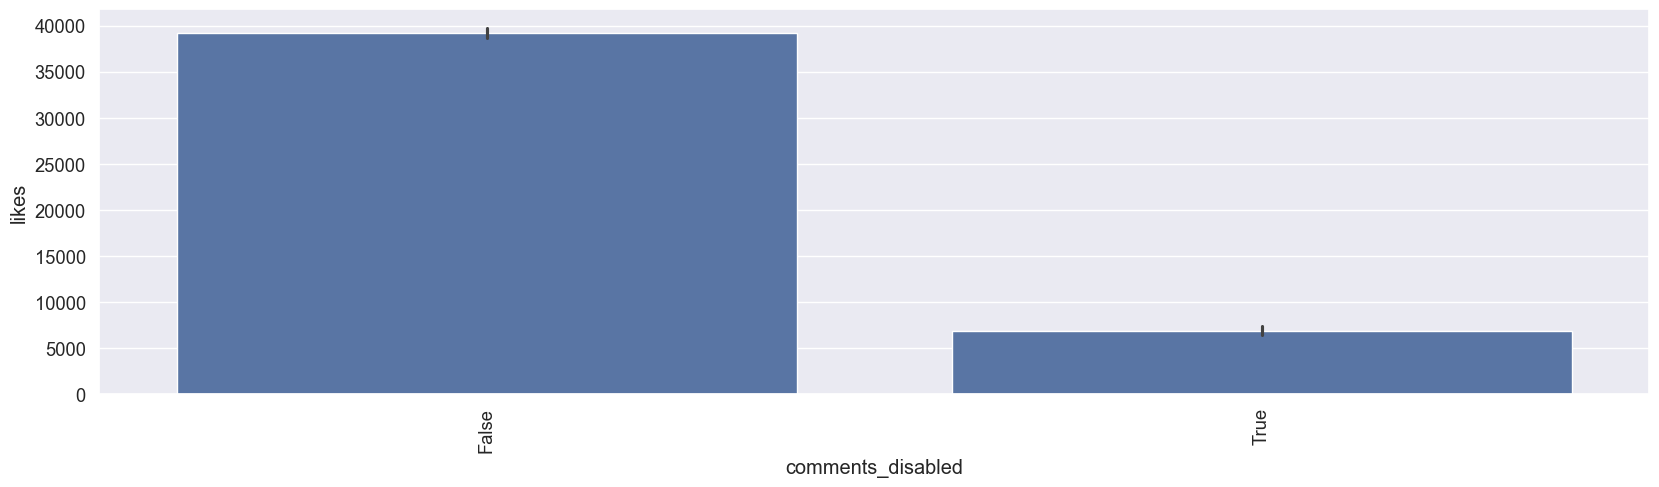

In [16]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 5))

col = 'comments_disabled'
g = sns.barplot(x=f"{col}", y='likes', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.xlabel(f'{col}')
plt.ylabel('likes')
plt.show()

<b>ratings_disabled</b><br>
No hay ningún like en las publicaciones con los ratings deshabilitados.

C:\Users\Enrique\AppData\Local\Temp\ipykernel_12496\2114866685.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


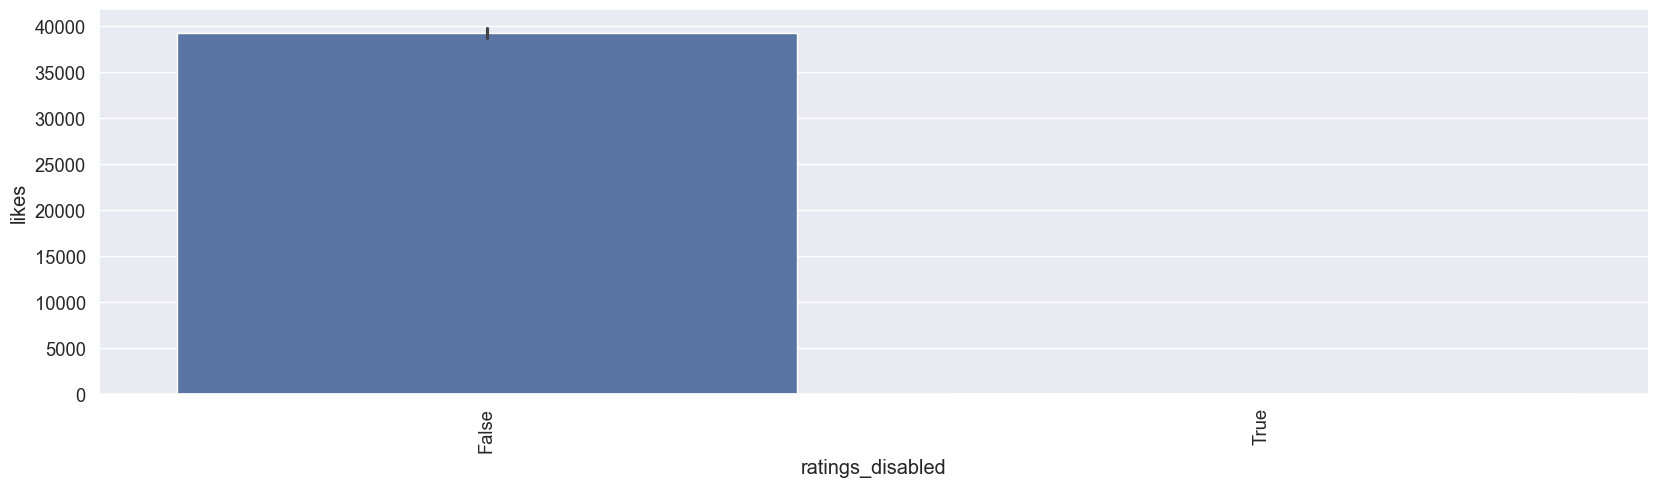

In [17]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 5))

col = 'ratings_disabled'
g = sns.barplot(x=f"{col}", y='likes', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.xlabel(f'{col}')
plt.ylabel('likes')
plt.show()

In [18]:
df.groupby(col)['likes'].sum()

ratings_disabled
False    13957234388
True               0
Name: likes, dtype: int64

<b>category</b><br>
La categoría con más likes con diferencia es Music, seguida por Entertainment a mucha distancia<br>
Por otra parte, hay categorías sin apenas likes, comparativamente hablando: Autos & Vehicles, Movies, Nonprofits & Activism, Shows, Travel & Events y especialmente Trailers.

C:\Users\Enrique\AppData\Local\Temp\ipykernel_12496\1561052633.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


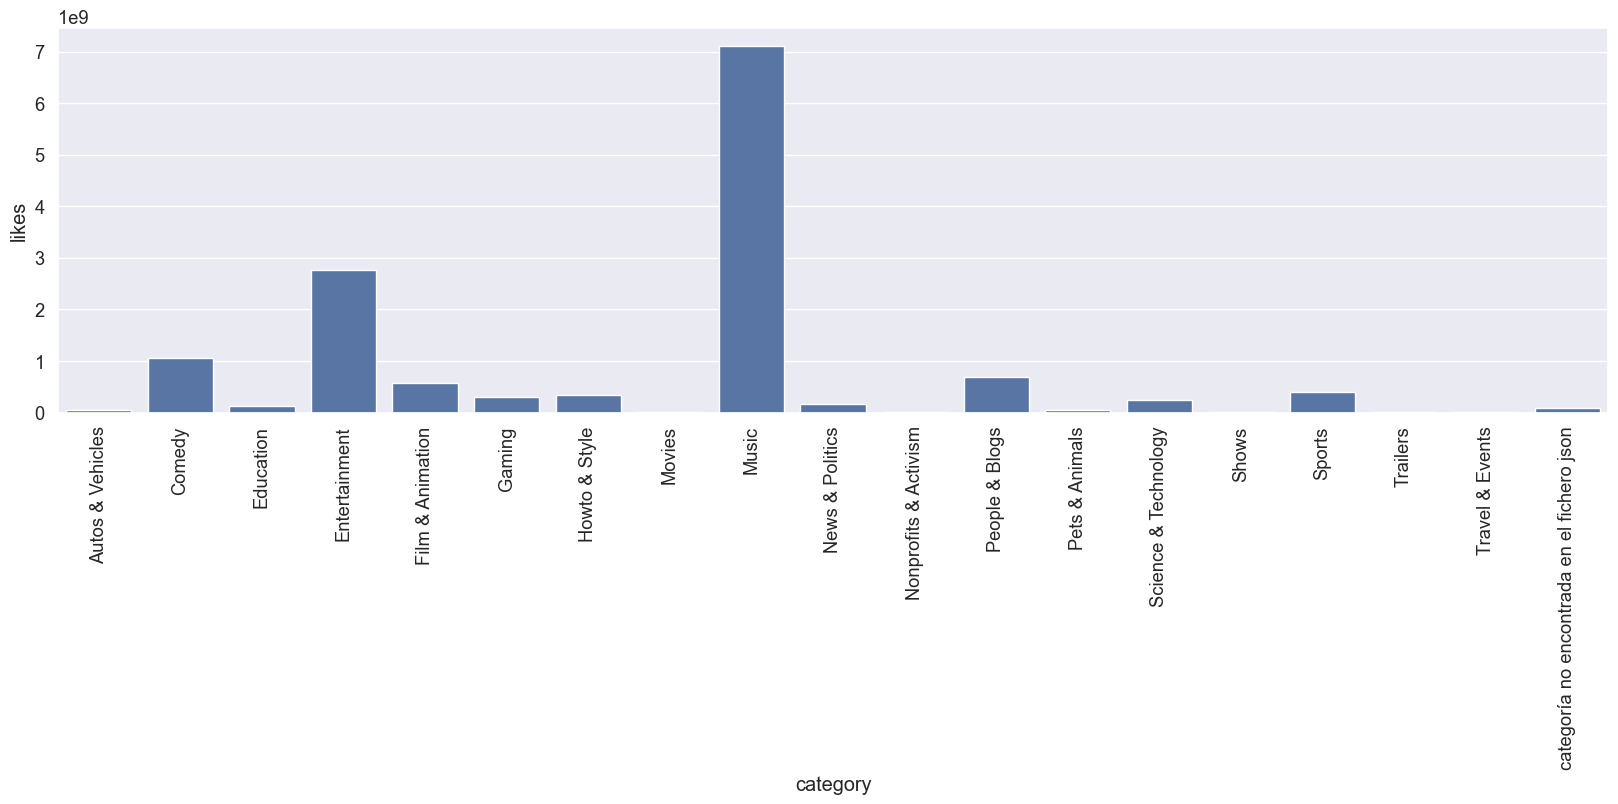

In [19]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 5))

col = 'category'
df_likes = pd.DataFrame({'likes_sum': df.groupby(col)['likes'].sum()})
g = sns.barplot(x=f"{col}", y='likes_sum', data=df_likes)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.xlabel(f'{col}')
plt.ylabel('likes')
plt.show()

In [20]:
df_likes

,likes_sum
category,
Autos & Vehicles,45290435
Comedy,1049389672
Education,116713769
Entertainment,2769077017
Film & Animation,574731287
Gaming,294389505
Howto & Style,345314374
Movies,752516
Music,7111757906


<b>country</b><br>
Por países también hay algunas diferencias, Gran Bretaña tiene muchos más likes que los demás países, seguida por EEUU a bastante distancia.<br>
Japón es con diferencia el país con menor número de likes.

C:\Users\Enrique\AppData\Local\Temp\ipykernel_12496\228161480.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


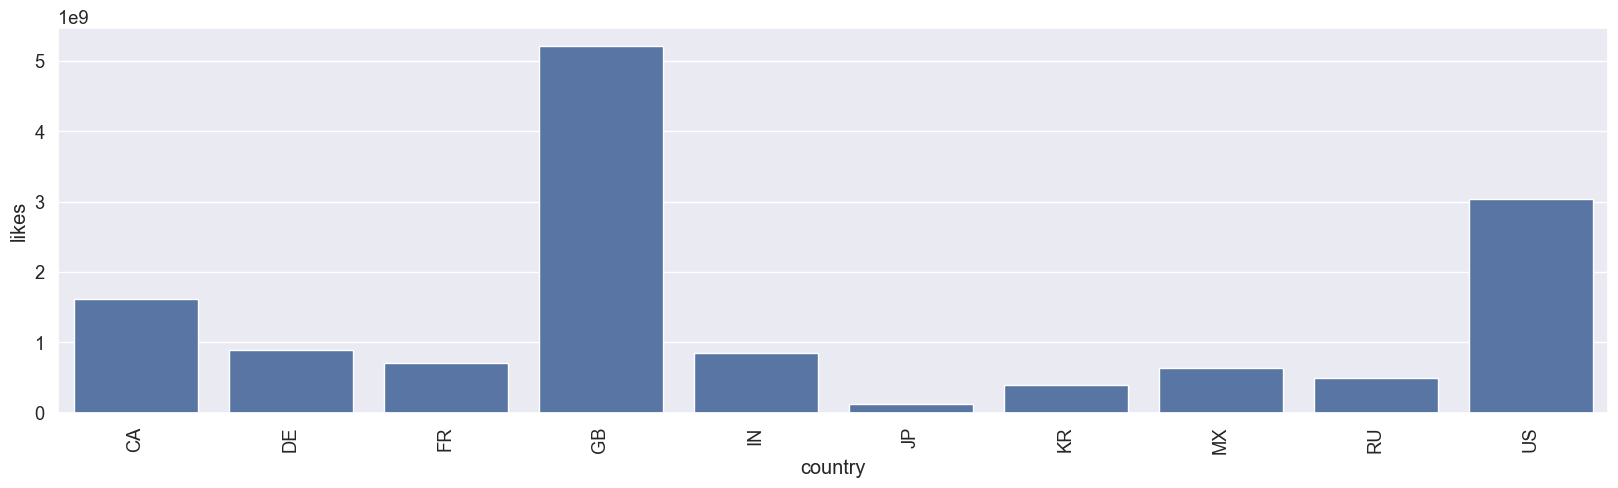

In [21]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 5))

col = 'country'
df_likes = pd.DataFrame({'likes_sum': df.groupby(col)['likes'].sum()})
g = sns.barplot(x=f"{col}", y='likes_sum', data=df_likes)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.xlabel(f'{col}')
plt.ylabel('likes')
plt.show()

<b>channel_title</b>

De los 20 valores de channel_title más repetidos vemos que los likes están concentrados en Marvel Entertainment y PewDiePie.<br>
Los títulos de canal con menos likes son ESPN, SET India, VikatanTV y RadaanMedia.

In [22]:
col = 'channel_title'
# apariciones de cada valor de channel_title
channel_counts = df[col].value_counts()
# N valores de channel_title más comunes
N = 20
top_channels = channel_counts.head(N)
# filtro del dataframe de los N channel_title más comunes
df_top_channels = df[df[col].isin(top_channels.index)]

C:\Users\Enrique\AppData\Local\Temp\ipykernel_12496\2077139968.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


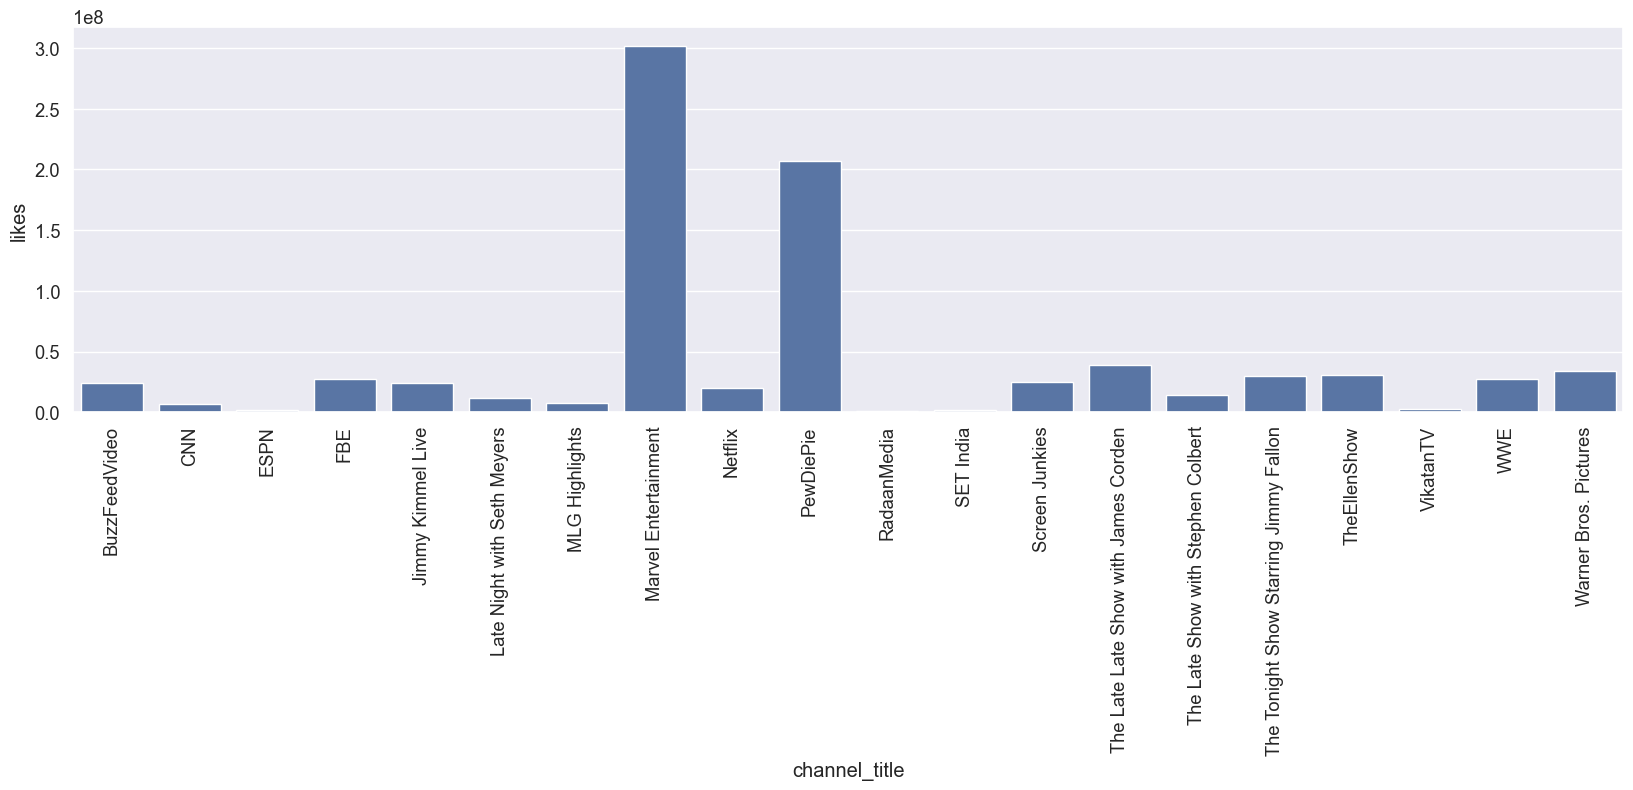

In [23]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 5))

df_likes = pd.DataFrame({'likes_sum': df_top_channels.groupby(col)['likes'].sum()})
g = sns.barplot(x=f"{col}", y='likes_sum', data=df_likes)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.xlabel(f'{col}')
plt.ylabel('likes')
plt.show()

<b>tags</b>

Separamos tags en los valores individuales.

In [24]:
df_tags = df.copy()
# convertimos tags en listas de valores individuales
df_tags['tags_separados'] = df_tags['tags'].apply(lambda x: x.split('|'))
# creamos nuevos registros para tener un valor individual en cada registro
df_tags = df_tags.explode('tags_separados', ignore_index=True)
df_tags[['tags', 'tags_separados']]

,tags,tags_separados
0,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",Eminem
1,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...","""Walk"""
2,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...","""On"""
3,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...","""Water"""
4,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...","""Aftermath/Shady/Interscope"""
...,...,...
6272713,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...","""ending explained"""
6272714,"call of duty|""cod""|""activision""|""Black Ops 4""",call of duty
6272715,"call of duty|""cod""|""activision""|""Black Ops 4""","""cod"""
6272716,"call of duty|""cod""|""activision""|""Black Ops 4""","""activision"""


Separamos los 20 valores más repetidos de tags.

In [25]:
col = 'tags_separados'
# apariciones de cada valor de tags
tags_counts = df_tags[col].value_counts()
# N valores de tags más comunes
N = 20
top_tags = tags_counts.head(N)
# filtro del dataframe de los N tags más comunes
df_top_tags = df_tags[df_tags[col].isin(top_tags.index)]

C:\Users\Enrique\AppData\Local\Temp\ipykernel_12496\3719911585.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


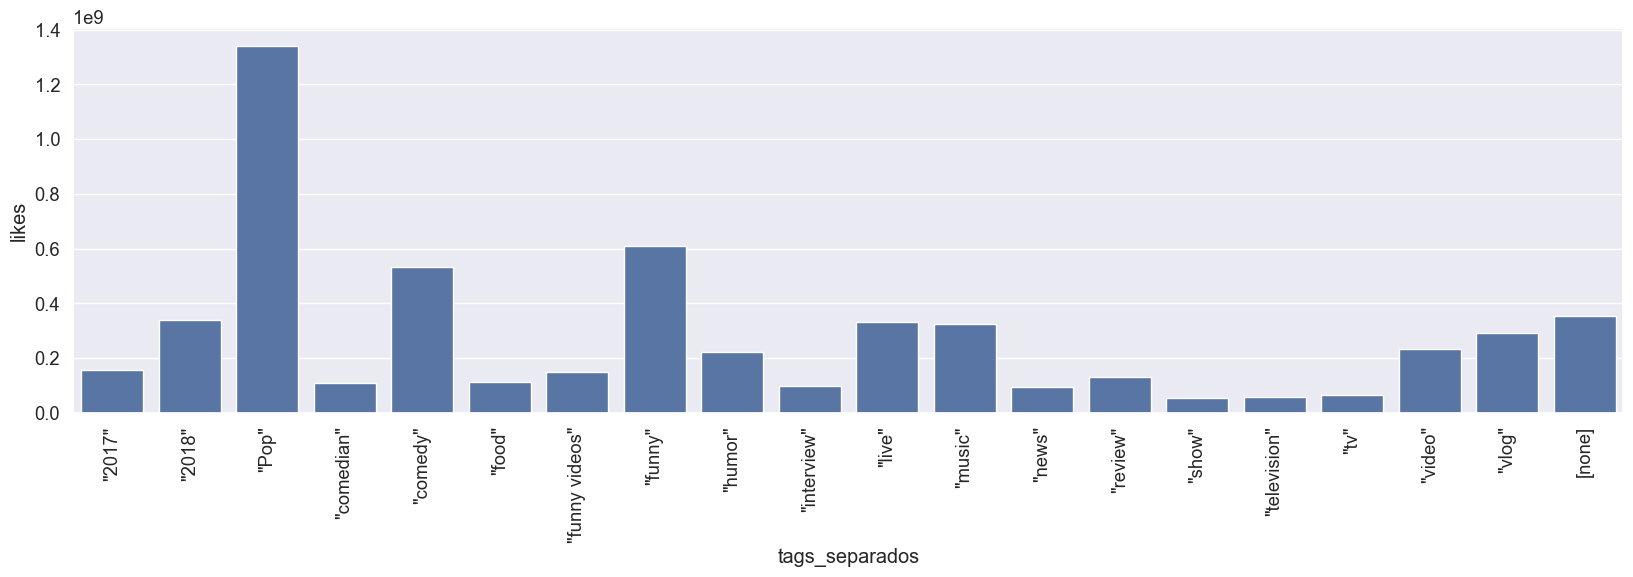

In [26]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 5))

col = 'tags_separados'
df_likes = pd.DataFrame({'likes_sum': df_top_tags.groupby(col)['likes'].sum()})
g = sns.barplot(x=f"{col}", y='likes_sum', data=df_likes)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.xlabel(f'{col}')
plt.ylabel('likes')
plt.show()

Basándonos en los 20 tags individuales más repetidos, el que más likes recibe es 'Pop', muy por encima del resto.<br>
Con muy pocos likes tenemos 'show', 'television' y 'tv'.

Codificamos la variable tags_separados, usando Label Encoder.

In [27]:
le = LabelEncoder()

In [28]:
tags_model = le.fit(df_tags['tags_separados'])
df_tags['tags_separados_encoded'] = tags_model.transform(df_tags['tags_separados'])
df_tags[['tags_separados', 'tags_separados_encoded']]

,tags_separados,tags_separados_encoded
0,Eminem,848500
1,"""Walk""",213305
2,"""On""",150933
3,"""Water""",213916
4,"""Aftermath/Shady/Interscope""",26090
...,...,...
6272713,"""ending explained""",322619
6272714,call of duty,867883
6272715,"""cod""",283597
6272716,"""activision""",223424


# Preprocesamiento de datos

Preparamos el dataset para aplicar algoritmos de Machine Learning.<br>

Vamos a preparar dos versiones del dataset:

- df: variable 'tags' original
- df_tags: variable 'tags_separados', con un registro para cada tag individual

El motivo de esta división es que df tiene unos 350.000 registros, y df_tags más de 6 millones, por lo que es mucho más costoso su estudio computacionalmente hablando.

In [29]:
df.columns

Index(['channel_title', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'category', 'country',
       'trending_date_year', 'trending_date_month', 'publish_time_year',
       'publish_time_month', 'ratio_viralidad', 'ratio_interaccion_dia',
       'publish_trending_days', 'channel_title_encoded', 'tags_encoded',
       'category_encoded', 'country_encoded', 'views_encoded', 'likes_encoded',
       'dislikes_encoded', 'comment_count_encoded',
       'ratio_interaccion_dia_encoded', 'trending_date_year_encoded',
       'trending_date_month_encoded', 'publish_time_year_encoded',
       'publish_time_month_encoded'],
      dtype='object')

In [30]:
df_tags.columns

Index(['channel_title', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'category', 'country',
       'trending_date_year', 'trending_date_month', 'publish_time_year',
       'publish_time_month', 'ratio_viralidad', 'ratio_interaccion_dia',
       'publish_trending_days', 'channel_title_encoded', 'tags_encoded',
       'category_encoded', 'country_encoded', 'views_encoded', 'likes_encoded',
       'dislikes_encoded', 'comment_count_encoded',
       'ratio_interaccion_dia_encoded', 'trending_date_year_encoded',
       'trending_date_month_encoded', 'publish_time_year_encoded',
       'publish_time_month_encoded', 'tags_separados',
       'tags_separados_encoded'],
      dtype='object')

Vamos a estudiar dos grupos de variables de entrada y dos de salida:<br>
- X: entrada a partir del dataframe con una única variable tags
- X_tags: entrada a partir del dataframe con una variable para los tags separados
- y: salida a partir del dataframe con una única variable tags
- y_tags: salida a partir del dataframe con una variable para los tags separados

In [31]:
X = df[['channel_title_encoded', 'tags_encoded', 'views_encoded', 'dislikes_encoded', 'comment_count_encoded',\
        'comments_disabled', 'ratings_disabled', 'category_encoded', 'country_encoded', 'ratio_viralidad',\
        'ratio_interaccion_dia_encoded', 'publish_trending_days', 'trending_date_year_encoded',\
        'trending_date_month_encoded', 'publish_time_year_encoded', 'publish_time_month_encoded']]
X

,channel_title_encoded,tags_encoded,views_encoded,dislikes_encoded,comment_count_encoded,comments_disabled,ratings_disabled,category_encoded,country_encoded,ratio_viralidad,ratio_interaccion_dia_encoded,publish_trending_days,trending_date_year_encoded,trending_date_month_encoded,publish_time_year_encoded,publish_time_month_encoded
0,7408,15414,2.195188,1.803614,4.773962,False,False,8,0,0.055758,4.334115,3,-1.823782,0.909091,-1.758901,0.909091
1,28209,87447,-0.046118,-0.020748,0.342217,False,False,1,0,0.140454,0.455009,0,-1.823782,0.909091,-1.758901,0.909091
2,20687,88781,0.256091,0.138859,0.151795,False,False,1,0,0.049995,0.536320,1,-1.823782,0.909091,-1.758901,0.909091
3,29088,91178,0.103985,-0.007590,0.518462,False,False,3,0,0.072404,0.499064,1,-1.823782,0.909091,-1.758901,0.909091
4,7030,64232,4.467192,0.827083,3.171140,False,False,8,0,0.051912,8.064620,4,-1.823782,0.909091,-1.758901,0.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,910,51299,0.047033,-0.033994,-0.065135,False,False,12,9,0.025037,-0.007461,26,0.548311,0.454545,0.568537,0.363636
375938,30196,51138,-0.039156,-0.077842,-0.014908,False,False,11,9,0.060411,0.106531,26,0.548311,0.454545,0.568537,0.363636
375939,3535,21958,-0.038926,-0.049426,-0.012709,False,False,3,9,0.049784,0.048649,26,0.548311,0.454545,0.568537,0.363636
375940,10426,8106,0.598922,0.029875,0.344494,False,False,4,9,0.036901,0.850929,27,0.548311,0.454545,0.568537,0.363636


In [32]:
X_tags = df_tags[['channel_title_encoded', 'views_encoded', 'dislikes_encoded', 'comment_count_encoded',\
                  'publish_trending_days', 'comments_disabled', 'ratings_disabled', 'category_encoded',\
                  'country_encoded', 'ratio_viralidad', 'ratio_interaccion_dia_encoded', 'trending_date_year_encoded',\
                  'trending_date_month_encoded', 'publish_time_year_encoded', 'publish_time_month_encoded',\
                  'tags_separados_encoded']]
X_tags

,channel_title_encoded,views_encoded,dislikes_encoded,comment_count_encoded,publish_trending_days,comments_disabled,ratings_disabled,category_encoded,country_encoded,ratio_viralidad,ratio_interaccion_dia_encoded,trending_date_year_encoded,trending_date_month_encoded,publish_time_year_encoded,publish_time_month_encoded,tags_separados_encoded
0,7408,2.195188,1.803614,4.773962,3,False,False,8,0,0.055758,4.334115,-1.823782,0.909091,-1.758901,0.909091,848500
1,7408,2.195188,1.803614,4.773962,3,False,False,8,0,0.055758,4.334115,-1.823782,0.909091,-1.758901,0.909091,213305
2,7408,2.195188,1.803614,4.773962,3,False,False,8,0,0.055758,4.334115,-1.823782,0.909091,-1.758901,0.909091,150933
3,7408,2.195188,1.803614,4.773962,3,False,False,8,0,0.055758,4.334115,-1.823782,0.909091,-1.758901,0.909091,213916
4,7408,2.195188,1.803614,4.773962,3,False,False,8,0,0.055758,4.334115,-1.823782,0.909091,-1.758901,0.909091,26090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6272713,10426,0.598922,0.029875,0.344494,27,False,False,4,9,0.036901,0.850929,0.548311,0.454545,0.568537,0.363636,322619
6272714,4097,1.243842,9.215949,5.516684,27,False,False,5,9,0.069362,3.456724,0.548311,0.454545,0.568537,0.363636,867883
6272715,4097,1.243842,9.215949,5.516684,27,False,False,5,9,0.069362,3.456724,0.548311,0.454545,0.568537,0.363636,283597
6272716,4097,1.243842,9.215949,5.516684,27,False,False,5,9,0.069362,3.456724,0.548311,0.454545,0.568537,0.363636,223424


In [33]:
y = df[['likes_encoded']].copy(deep=True)
y

,likes_encoded
0,4.501606
1,0.536588
2,0.646234
3,0.563307
4,9.591119
...,...
375937,-0.002199
375938,0.129129
375939,0.057358
375940,0.928280


In [34]:
y_tags = df_tags[['likes_encoded']].copy(deep=True)
y_tags

,likes_encoded
0,4.501606
1,4.501606
2,4.501606
3,4.501606
4,4.501606
...,...
6272713,0.928280
6272714,1.914812
6272715,1.914812
6272716,1.914812


- <b>Mapa de correlaciones</b> de todas las variables implicadas

In [35]:
X_for_corr = X.copy()
X_for_corr['likes'] = y

In [36]:
X_for_corr.columns

Index(['channel_title_encoded', 'tags_encoded', 'views_encoded',
       'dislikes_encoded', 'comment_count_encoded', 'comments_disabled',
       'ratings_disabled', 'category_encoded', 'country_encoded',
       'ratio_viralidad', 'ratio_interaccion_dia_encoded',
       'publish_trending_days', 'trending_date_year_encoded',
       'trending_date_month_encoded', 'publish_time_year_encoded',
       'publish_time_month_encoded', 'likes'],
      dtype='object')

In [37]:
X_for_corr.head()

,channel_title_encoded,tags_encoded,views_encoded,dislikes_encoded,comment_count_encoded,comments_disabled,ratings_disabled,category_encoded,country_encoded,ratio_viralidad,ratio_interaccion_dia_encoded,publish_trending_days,trending_date_year_encoded,trending_date_month_encoded,publish_time_year_encoded,publish_time_month_encoded,likes
0,7408,15414,2.195188,1.803614,4.773962,False,False,8,0,0.055758,4.334115,3,-1.823782,0.909091,-1.758901,0.909091,4.501606
1,28209,87447,-0.046118,-0.020748,0.342217,False,False,1,0,0.140454,0.455009,0,-1.823782,0.909091,-1.758901,0.909091,0.536588
2,20687,88781,0.256091,0.138859,0.151795,False,False,1,0,0.049995,0.536320,1,-1.823782,0.909091,-1.758901,0.909091,0.646234
3,29088,91178,0.103985,-0.007590,0.518462,False,False,3,0,0.072404,0.499064,1,-1.823782,0.909091,-1.758901,0.909091,0.563307
4,7030,64232,4.467192,0.827083,3.171140,False,False,8,0,0.051912,8.064620,4,-1.823782,0.909091,-1.758901,0.909091,9.591119


In [38]:
corr_matrix = X_for_corr.corr()

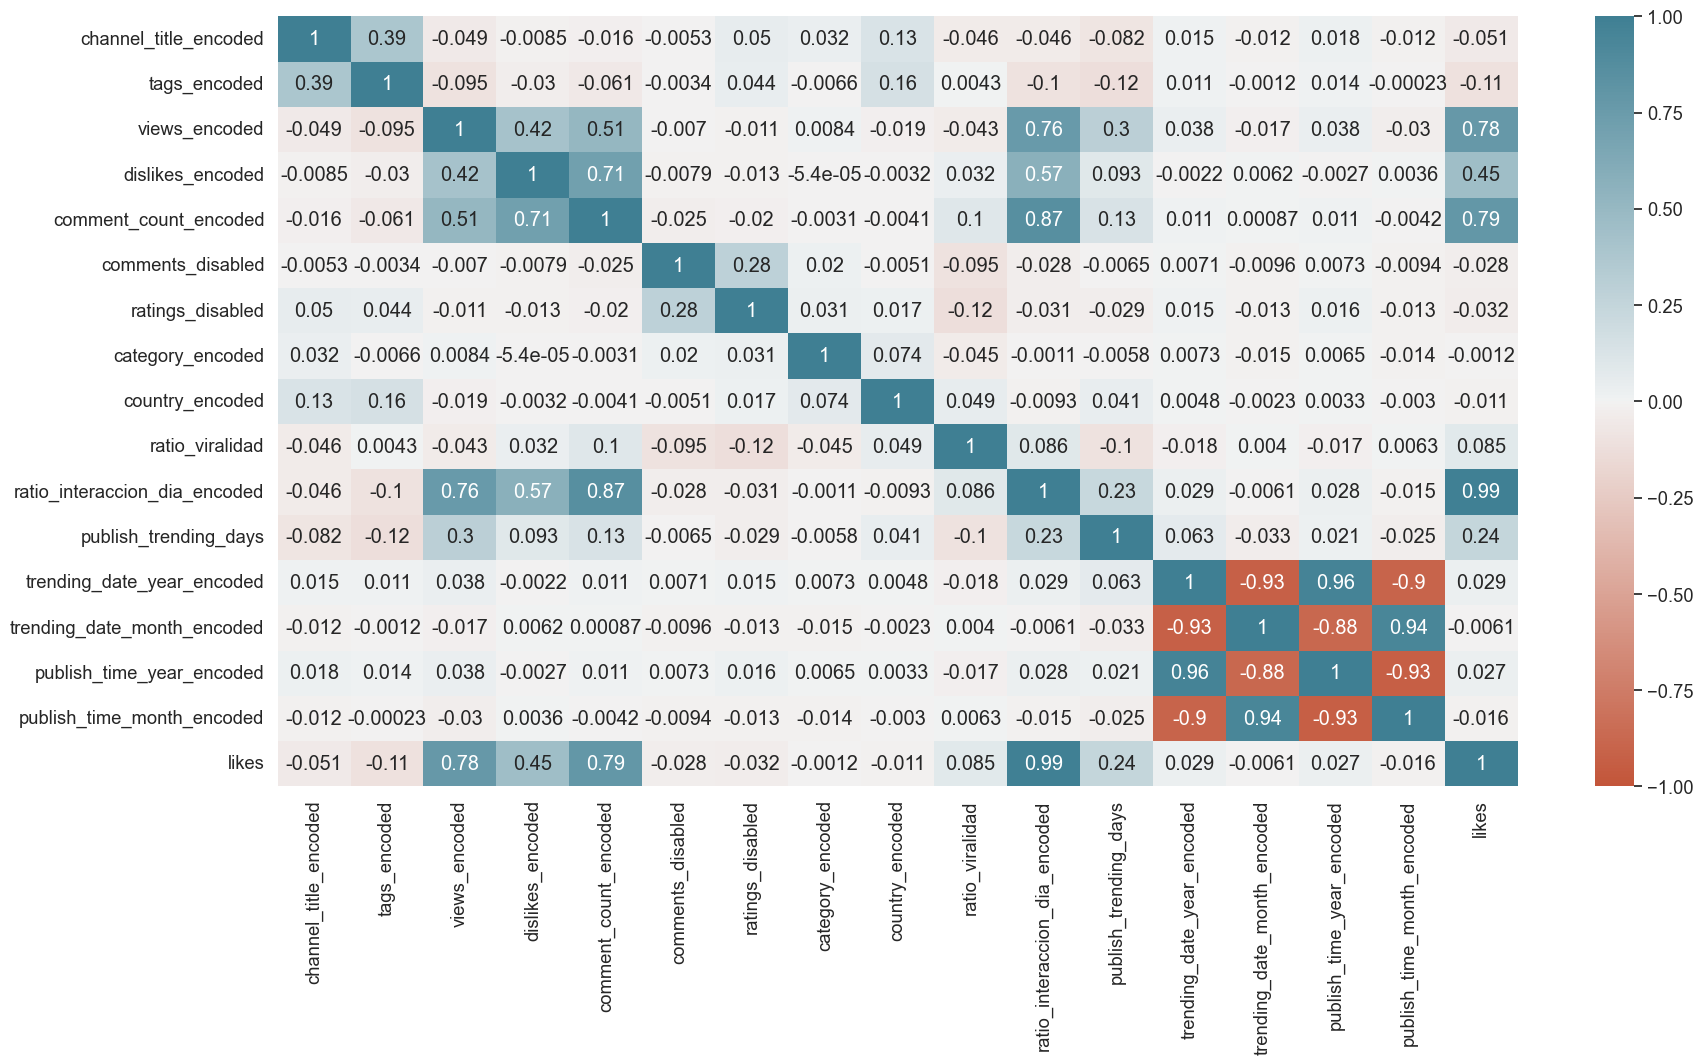

In [39]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap=sns.diverging_palette(20, 220, n=256), vmin=-1, vmax=1)
plt.show()

Existe una muy alta correlación lineal entre la variable objetivo, likes, y ratio_interaccion_dia, y una alta correlación con views, dislikes y comment_count.

- <b>Entrenamiento y validación</b>

- dataset con variable tags

In [40]:
X.columns

Index(['channel_title_encoded', 'tags_encoded', 'views_encoded',
       'dislikes_encoded', 'comment_count_encoded', 'comments_disabled',
       'ratings_disabled', 'category_encoded', 'country_encoded',
       'ratio_viralidad', 'ratio_interaccion_dia_encoded',
       'publish_trending_days', 'trending_date_year_encoded',
       'trending_date_month_encoded', 'publish_time_year_encoded',
       'publish_time_month_encoded'],
      dtype='object')

In [41]:
X

,channel_title_encoded,tags_encoded,views_encoded,dislikes_encoded,comment_count_encoded,comments_disabled,ratings_disabled,category_encoded,country_encoded,ratio_viralidad,ratio_interaccion_dia_encoded,publish_trending_days,trending_date_year_encoded,trending_date_month_encoded,publish_time_year_encoded,publish_time_month_encoded
0,7408,15414,2.195188,1.803614,4.773962,False,False,8,0,0.055758,4.334115,3,-1.823782,0.909091,-1.758901,0.909091
1,28209,87447,-0.046118,-0.020748,0.342217,False,False,1,0,0.140454,0.455009,0,-1.823782,0.909091,-1.758901,0.909091
2,20687,88781,0.256091,0.138859,0.151795,False,False,1,0,0.049995,0.536320,1,-1.823782,0.909091,-1.758901,0.909091
3,29088,91178,0.103985,-0.007590,0.518462,False,False,3,0,0.072404,0.499064,1,-1.823782,0.909091,-1.758901,0.909091
4,7030,64232,4.467192,0.827083,3.171140,False,False,8,0,0.051912,8.064620,4,-1.823782,0.909091,-1.758901,0.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,910,51299,0.047033,-0.033994,-0.065135,False,False,12,9,0.025037,-0.007461,26,0.548311,0.454545,0.568537,0.363636
375938,30196,51138,-0.039156,-0.077842,-0.014908,False,False,11,9,0.060411,0.106531,26,0.548311,0.454545,0.568537,0.363636
375939,3535,21958,-0.038926,-0.049426,-0.012709,False,False,3,9,0.049784,0.048649,26,0.548311,0.454545,0.568537,0.363636
375940,10426,8106,0.598922,0.029875,0.344494,False,False,4,9,0.036901,0.850929,27,0.548311,0.454545,0.568537,0.363636


In [42]:
y

,likes_encoded
0,4.501606
1,0.536588
2,0.646234
3,0.563307
4,9.591119
...,...
375937,-0.002199
375938,0.129129
375939,0.057358
375940,0.928280


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- dataset con variable tags_separados

In [44]:
X_tags.columns

Index(['channel_title_encoded', 'views_encoded', 'dislikes_encoded',
       'comment_count_encoded', 'publish_trending_days', 'comments_disabled',
       'ratings_disabled', 'category_encoded', 'country_encoded',
       'ratio_viralidad', 'ratio_interaccion_dia_encoded',
       'trending_date_year_encoded', 'trending_date_month_encoded',
       'publish_time_year_encoded', 'publish_time_month_encoded',
       'tags_separados_encoded'],
      dtype='object')

In [45]:
X_tags

,channel_title_encoded,views_encoded,dislikes_encoded,comment_count_encoded,publish_trending_days,comments_disabled,ratings_disabled,category_encoded,country_encoded,ratio_viralidad,ratio_interaccion_dia_encoded,trending_date_year_encoded,trending_date_month_encoded,publish_time_year_encoded,publish_time_month_encoded,tags_separados_encoded
0,7408,2.195188,1.803614,4.773962,3,False,False,8,0,0.055758,4.334115,-1.823782,0.909091,-1.758901,0.909091,848500
1,7408,2.195188,1.803614,4.773962,3,False,False,8,0,0.055758,4.334115,-1.823782,0.909091,-1.758901,0.909091,213305
2,7408,2.195188,1.803614,4.773962,3,False,False,8,0,0.055758,4.334115,-1.823782,0.909091,-1.758901,0.909091,150933
3,7408,2.195188,1.803614,4.773962,3,False,False,8,0,0.055758,4.334115,-1.823782,0.909091,-1.758901,0.909091,213916
4,7408,2.195188,1.803614,4.773962,3,False,False,8,0,0.055758,4.334115,-1.823782,0.909091,-1.758901,0.909091,26090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6272713,10426,0.598922,0.029875,0.344494,27,False,False,4,9,0.036901,0.850929,0.548311,0.454545,0.568537,0.363636,322619
6272714,4097,1.243842,9.215949,5.516684,27,False,False,5,9,0.069362,3.456724,0.548311,0.454545,0.568537,0.363636,867883
6272715,4097,1.243842,9.215949,5.516684,27,False,False,5,9,0.069362,3.456724,0.548311,0.454545,0.568537,0.363636,283597
6272716,4097,1.243842,9.215949,5.516684,27,False,False,5,9,0.069362,3.456724,0.548311,0.454545,0.568537,0.363636,223424


In [46]:
y_tags

,likes_encoded
0,4.501606
1,4.501606
2,4.501606
3,4.501606
4,4.501606
...,...
6272713,0.928280
6272714,1.914812
6272715,1.914812
6272716,1.914812


In [47]:
X_train_tags, X_test_tags, y_train_tags, y_test_tags = train_test_split(X_tags, y_tags, test_size=0.3, random_state=42)

# Regresión Lineal

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [49]:
reg_linearRegr = LinearRegression()

reg_linearRegr.fit(X_train, np.ravel(y_train))

score_train = reg_linearRegr.score(X_train, y_train)
print('Score Train: {:.2%}'.format(score_train))
score_test = reg_linearRegr.score(X_test, y_test)
print('Score Test: {:.2%}'.format(score_test))

Score Train: 99.92%
Score Test: 99.92%


In [50]:
y_train_pred = reg_linearRegr.predict(X_train)
y_test_pred = reg_linearRegr.predict(X_test)

In [51]:
print('- Train:')

mae = mean_absolute_error(y_train, y_train_pred)
print('Mean Absolute Error: {:.2%}'.format(mae))

mse = mean_squared_error(y_train, y_train_pred)
print('Mean Squared Error: {:.2%}'.format(mse))

rmse = root_mean_squared_error(y_train, y_train_pred)
print('Root Mean Squared Error: {:.2%}'.format(rmse))

- Train:
Mean Absolute Error: 0.80%
Mean Squared Error: 0.08%
Root Mean Squared Error: 2.75%


In [52]:
print('- Test:')

mae = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error: {:.2%}'.format(mae))

mse = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error: {:.2%}'.format(mse))

rmse = root_mean_squared_error(y_test, y_test_pred)
print('Root Mean Squared Error: {:.2%}'.format(rmse))

- Test:
Mean Absolute Error: 0.80%
Mean Squared Error: 0.08%
Root Mean Squared Error: 2.91%


- Variable de entrada: X_tags

In [53]:
reg_linearRegr_tags = LinearRegression()

reg_linearRegr_tags.fit(X_train_tags, np.ravel(y_train_tags))

score_train_tags = reg_linearRegr_tags.score(X_train_tags, y_train_tags)
print('Score Train: {:.2%}'.format(score_train_tags))
score_test_tags = reg_linearRegr_tags.score(X_test_tags, y_test_tags)
print('Score Test: {:.2%}'.format(score_test_tags))

Score Train: 99.93%
Score Test: 99.93%


In [54]:
y_train_pred_tags = reg_linearRegr_tags.predict(X_train_tags)
y_test_pred_tags = reg_linearRegr_tags.predict(X_test_tags)

In [55]:
print('- Train:')

mae = mean_absolute_error(y_train_tags, y_train_pred_tags)
print('Mean Absolute Error: {:.2%}'.format(mae))

mse = mean_squared_error(y_train_tags, y_train_pred_tags)
print('Mean Squared Error: {:.2%}'.format(mse))

rmse = root_mean_squared_error(y_train_tags, y_train_pred_tags)
print('Root Mean Squared Error: {:.2%}'.format(rmse))

- Train:
Mean Absolute Error: 0.75%
Mean Squared Error: 0.05%
Root Mean Squared Error: 2.31%


In [56]:
print('- Test:')

mae = mean_absolute_error(y_test_tags, y_test_pred_tags)
print('Mean Absolute Error: {:.2%}'.format(mae))

mse = mean_squared_error(y_test_tags, y_test_pred_tags)
print('Mean Squared Error: {:.2%}'.format(mse))

rmse = root_mean_squared_error(y_test_tags, y_test_pred_tags)
print('Root Mean Squared Error: {:.2%}'.format(rmse))

- Test:
Mean Absolute Error: 0.75%
Mean Squared Error: 0.05%
Root Mean Squared Error: 2.31%


<b>Resultados Regresión Lineal</b><br>


El Score de entrenamiento y de pruebas de ambas variables de entrada es muy similar y muy elevado, más del 99.9%.<br>
En cuanto a los errores, son algo inferiores en el caso de la variable de entrada con los tags separados, y entre los errores de los conjuntos de entrenamiento y pruebas hay menor diferencia en el caso de tags separados que en el caso de una única variable tags, en que los errores del conjunto de pruebas son ligeramente superiores a los del conjunto de entrenamiento. En cualquier caso, todos son errores muy bajos.<br>
Podemos decir por tanto que la Regresión Lineal ha creado dos buenos modelos para este caso.

# MLP (Perceptrones Multicapa)

In [57]:
from sklearn.neural_network import MLPRegressor

- Variable de entrada: X

In [58]:
reg_MLP = MLPRegressor(random_state=42, verbose=1)

<b>Muestreo de los datos de entrada</b><br>
Por necesidades computacionales, utilizo un muestreo en vez de los datos completos para entrenar el algoritmo.

In [59]:
# porcentaje de muestreo
sample_size = 0.2

# muestreo del conjunto de entrenamiento
X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train, y_train, train_size=sample_size, random_state=42)

<b>Randomized Search</b>

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
hidden_layer_sizes_rs_MLP=[(100, 100), (100, 100, 100)]   # (100,) / tamaño capas ocultas
activation_rs_MLP=['relu', 'logistic', 'identity']   #'relu': función de activación; ‘identity’, ‘logistic’, ‘tanh’
alpha_rs_MLP=[0.0005, 0.001]   # 0.0001 / coef. de regularización L2, controla el sobreajuste (mayor > aprendizaje conservador, menor prob. sobreajuste)
batch_size_rs_MLP=['auto']   # 'auto': tamaño de los lotes en que se divide el dataset; menor, más preciso pero más lento; 'auto': batch_size=min(200, n_samples)
learning_rate_rs_MLP=['constant', 'invscaling']   # 'constant' / ritmo de aprendizaje; invscaling: disminuye la tasa de aprendizaje a medida que avanzan las iteraciones; adaptive: tasa constante, se reduce si el error en la validación deja de mejorar
max_iter_rs_MLP=[700, 900]   # 200: número de épocas (cuántas veces se utiliza cada punto de datos), no número de pasos del gradiente
shuffle_rs_MLP=[True]   # True: baraja aleatoriamente los datos
early_stopping_rs_MLP=[True]
n_iter_no_change_rs_MLP=[10, 20]   # 10 / uso con early_stopping

random_grid_rs_MLP = {'hidden_layer_sizes': hidden_layer_sizes_rs_MLP, 'activation': activation_rs_MLP, 'alpha': alpha_rs_MLP, 'batch_size':batch_size_rs_MLP,\
                      'learning_rate': learning_rate_rs_MLP, 'max_iter': max_iter_rs_MLP, 'shuffle': shuffle_rs_MLP, 'early_stopping':early_stopping_rs_MLP, 'n_iter_no_change':n_iter_no_change_rs_MLP}

In [62]:
print('Iterando...')

MLP_rscv = RandomizedSearchCV(estimator=reg_MLP, param_distributions=random_grid_rs_MLP, scoring=None, n_iter=20, cv=5, verbose=1, random_state=42, n_jobs=-1, error_score='raise')
MLP_rscv.fit(X_train, np.ravel(y_train))

best_params_MLP_rscv = MLP_rscv.best_params_
print(f"Best paramters: {best_params_MLP_rscv})")

Iterando...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Iteration 1, loss = 194113.57535814
Validation score: -4.659327
Iteration 2, loss = 53411.02442455
Validation score: 0.147610
Iteration 3, loss = 24470.23819083
Validation score: -1079.044553
Iteration 4, loss = 41284.76989872
Validation score: -18290.501255
Iteration 5, loss = 10727.16162515
Validation score: 0.019151
Iteration 6, loss = 28332.03794458
Validation score: 0.334265
Iteration 7, loss = 5151.85803831
Validation score: -77137.848084
Iteration 8, loss = 21983.58721111
Validation score: 0.823904
Iteration 9, loss = 9696.53929069
Validation score: 0.843656
Iteration 10, loss = 6707.87575620
Validation score: 0.520003
Iteration 11, loss = 5537.96644334
Validation score: -0.917237
Iteration 12, loss = 4605.65430562
Validation score: -8444.858140
Iteration 13, loss = 5186.14592733
Validation score: 0.876921
Iteration 14, loss = 7013.90570152
Validation score: 0.828039
Iteration 15, loss = 5206.31283209
Vali

<b>Grid Search</b>

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
# a partir de los mejores parámetros de Randomized Search, escogemos parámetros para Grid Search

hidden_layer_sizes_gs_MLP=[(100, 100), (100, 100, 100)]   # (100,) / tamaño capas ocultas
activation_gs_MLP=['relu', 'identity']   #'relu': función de activación; ‘identity’, ‘logistic’, ‘tanh’
alpha_gs_MLP=[0.0005]   # 0.0001 / coef. de regularización L2, controla el sobreajuste (mayor > aprendizaje conservador, menor prob. sobreajuste)
batch_size_gs_MLP=['auto']   # 'auto': tamaño de los lotes en que se divide el dataset; menor, más preciso pero más lento; 'auto': batch_size=min(200, n_samples)
learning_rate_gs_MLP=['invscaling']   # 'constant' / ritmo de aprendizaje; invscaling: disminuye la tasa de aprendizaje a medida que avanzan las iteraciones; adaptive: tasa constante, se reduce si el error en la validación deja de mejorar
max_iter_gs_MLP=range(600, 801, 100)   # 200: número de épocas (cuántas veces se utiliza cada punto de datos), no número de pasos del gradiente
shuffle_gs_MLP=[True]   # True: baraja aleatoriamente los datos
early_stopping_gs_MLP=[True]
n_iter_no_change_gs_MLP=range(10, 31, 10)   # 10 / uso con early_stopping

random_grid_gs_MLP = {'hidden_layer_sizes': hidden_layer_sizes_gs_MLP, 'activation': activation_gs_MLP, 'alpha': alpha_gs_MLP, 'batch_size':batch_size_gs_MLP,\
                      'learning_rate': learning_rate_gs_MLP, 'max_iter': max_iter_gs_MLP, 'shuffle': shuffle_gs_MLP}

In [65]:
print('Iterando...')

MLP_gscv = GridSearchCV(estimator=reg_MLP, param_grid=random_grid_gs_MLP, scoring=None, cv=5, verbose=1, n_jobs=-1, error_score='raise')

MLP_gscv.fit(X_train, np.ravel(y_train))

best_params_MLP_gscv = MLP_gscv.best_params_
print(f"Best parameters: {best_params_MLP_gscv}")

Iterando...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Iteration 1, loss = 15634.22934039
Iteration 2, loss = 1000.13036265
Iteration 3, loss = 1630.96906405
Iteration 4, loss = 746.05728027
Iteration 5, loss = 429.64116618
Iteration 6, loss = 435.02828138
Iteration 7, loss = 81.11655798
Iteration 8, loss = 100.00689234
Iteration 9, loss = 96.77041289
Iteration 10, loss = 30.71395816
Iteration 11, loss = 284.32914986
Iteration 12, loss = 0.46263238
Iteration 13, loss = 0.21753517
Iteration 14, loss = 1.84592857
Iteration 15, loss = 2.31825328
Iteration 16, loss = 33.48284964
Iteration 17, loss = 0.34443384
Iteration 18, loss = 0.34453189
Iteration 19, loss = 0.47773907
Iteration 20, loss = 0.32094879
Iteration 21, loss = 0.29021867
Iteration 22, loss = 0.98522836
Iteration 23, loss = 0.49698338
Iteration 24, loss = 0.52528324
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Best parameters: {'activation': 'relu', 'alpha': 0.000

### MLP

In [76]:
print('Iterando...')

reg_MLP = MLPRegressor(**best_params_MLP_gscv)
reg_MLP.fit(X_train, np.ravel(y_train))

print('Acabado')

Iterando...
Acabado


<b>Evaluación</b>

In [77]:
score_train = reg_MLP.score(X_train, y_train)
print('Score Train: {:.2%}'.format(score_train))
score_test = reg_MLP.score(X_test, y_test)
print('Score Test: {:.2%}'.format(score_test))

Score Train: -0.02%
Score Test: -0.02%


In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [79]:
print('- Train:')

y_train_pred = reg_MLP.predict(X_train)

mae = mean_absolute_error(y_train, y_train_pred)
print('Mean Absolute Error: {:.2%}'.format(mae))

mse = mean_squared_error(y_train, y_train_pred)
print('Mean Squared Error: {:.2%}'.format(mse))

rmse = root_mean_squared_error(y_train, y_train_pred)
print('Root Mean Squared Error: {:.2%}'.format(rmse))

- Train:
Mean Absolute Error: 31.97%
Mean Squared Error: 99.17%
Root Mean Squared Error: 99.58%


In [80]:
print('- Test:')

y_test_pred = reg_MLP.predict(X_test)

mae = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error: {:.2%}'.format(mae))

mse = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error: {:.2%}'.format(mse))

rmse = root_mean_squared_error(y_test, y_test_pred)
print('Root Mean Squared Error: {:.2%}'.format(rmse))

- Test:
Mean Absolute Error: 31.96%
Mean Squared Error: 102.00%
Root Mean Squared Error: 101.00%


# Resultados MLP

MLP ofrece muy malos resultados, tanto en score como en las medidas de error

# Conclusiones

Regresión Lineal obtiene mejores resultados y menores tasas de error que MLP, por lo que vamos a industrializar Regresión Lineal.